In [24]:
import joblib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score

# Cargar el dataset limpio

In [ ]:
data = pd.read_csv('C:/Users/ASUS/Desktop/Exercise in class - ML/data/data_clean.csv')

Dividimos el dataset

In [ ]:
X = data.drop('condition', axis=1)
y = data['condition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Definir la función modelPipeline
def modelPipeline(X_train, X_test, y_train, y_test):
    rs = 42
    # Modelos base
    log_reg = LogisticRegression(random_state=rs, solver='saga', max_iter=200)
    mlp = MLPClassifier(random_state=rs, max_iter=500)
    dt = DecisionTreeClassifier(random_state=rs)
    rf = RandomForestClassifier(random_state=rs)
    xgb = XGBClassifier(random_state=rs, verbosity=0)
    svc = SVC(random_state=rs)
    knn = KNeighborsClassifier()
    gnb = GaussianNB()

    # Columnas numéricas y categóricas
    num_cols = list(X_train.select_dtypes(include=['int', 'float']).columns)
    cat_cols = list(X_train.select_dtypes(include=['object', 'category', 'bool']).columns)

    # Preprocesamiento
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(with_mean=False), num_cols),
            ('cat', OneHotEncoder(), cat_cols)
        ]
    )

    # Modelos a evaluar
    clfs = [
        ('Logistic Regression', log_reg),
        ('MLP', mlp),
        ('Decision Tree', dt),
        ('Random Forest', rf),
        ('XGBoost', xgb),
        ('SVC', svc),
        ('KNeighbors', knn),
        ('GaussianNB', gnb)
    ]

    # Evaluación
    scores_data = pd.DataFrame(columns=['Model', 'F1_Score', 'Precision', 'Recall', 'Accuracy'])

    for clf_name, clf in clfs:
        pipe = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', clf)
        ])
        pipe.fit(X_train, y_train)
        y_pred = pipe.predict(X_test)

        f1 = f1_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred)
        acc = accuracy_score(y_test, y_pred)

        scores_data.loc[len(scores_data)] = [clf_name, f1, prec, rec, acc]

    return scores_data

In [4]:
# Ejecutar la función y mostrar los resultados
scores_df = modelPipeline(X_train, X_test, y_train, y_test)
print(scores_df)

c:\Users\ASUS\Desktop\Exercise in class - ML\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


                 Model  F1_Score  Precision    Recall  Accuracy
0  Logistic Regression  0.791970   0.674521  0.958944   0.73005
1                  MLP  0.795953   0.908340  0.708314   0.80540
2        Decision Tree  0.807187   0.836688  0.779696   0.80040
3        Random Forest  0.835461   0.850106  0.821312   0.82665
4              XGBoost  0.845237   0.871543  0.820472   0.83900
5                  SVC  0.793667   0.682971  0.947187   0.73610
6           KNeighbors  0.820994   0.839279  0.803490   0.81225
7           GaussianNB  0.445831   0.897009  0.296632   0.60485


In [ ]:
scores_df.to_csv('C:/Users/ASUS/Desktop/Exercise in class - ML/model/model_scores.csv', index=False)

# Análisis de características importantes (usando XGBoost)

## Definir el preprocesador nuevamente

se aplica el preprocesamiento
  - StandardScaler para columnas numéricas
  - OneHotEncoder para columnas categóricas

In [7]:
num_cols = list(X_train.select_dtypes(include=['int', 'float']).columns)
cat_cols = list(X_train.select_dtypes(include=['object', 'category', 'bool']).columns)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(with_mean=False), num_cols),
        ('cat', OneHotEncoder(), cat_cols)
    ]
)

Crear y entrenar el pipeline con XGBoost

In [8]:
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42, verbosity=0))
])
xgb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  StandardScaler(with_mean=False),
                                                  ['price', 'base_price',
                                                   'sold_quantity',
                                                   'available_quantity',
                                                   'has_warranty',
                                                   'free_shipping',
                                                   'picture_count',
                                                   'title_length']),
                                                 ('cat', OneHotEncoder(),
                                                  ['buying_mode_buy_it_now',
                                                   'buying_mode_classified',
                                                   'listing_type_id_free',
                                                   'listing_type_id_gold',
                                                   'lis...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

Guardar el modelo entrenado en un archivo .pkl

In [11]:
joblib.dump(xgb_pipeline, 'C:/Users/ASUS/Desktop/Exercise in class - ML/model/xgb_model.pkl')

['C:/Users/ASUS/Desktop/Exercise in class - ML/model/xgb_model.pkl']

## Obtener la importancia de las características

In [13]:
feature_importances = xgb_pipeline.named_steps['classifier'].feature_importances_
feature_importances

array([0.01882411, 0.03455924, 0.03424118, 0.26894185, 0.0136809 ,
       0.05314245, 0.008039  , 0.00463917, 0.00700299, 0.        ,
       0.10612484, 0.        , 0.31009853, 0.        , 0.0038895 ,
       0.        , 0.01450651, 0.        , 0.        , 0.        ,
       0.0335015 , 0.        , 0.01146048, 0.        , 0.00715123,
       0.        , 0.01946892, 0.        , 0.01613771, 0.        ,
       0.00514829, 0.        , 0.00421623, 0.        , 0.00461931,
       0.        , 0.00304719, 0.        , 0.00829025, 0.        ,
       0.0056843 , 0.        , 0.00358433, 0.        ], dtype=float32)

Obtener los nombres de las características después del preprocesamiento

In [14]:
feature_names = xgb_pipeline.named_steps['preprocessor'].get_feature_names_out()
feature_names

array(['num__price', 'num__base_price', 'num__sold_quantity',
       'num__available_quantity', 'num__has_warranty',
       'num__free_shipping', 'num__picture_count', 'num__title_length',
       'cat__buying_mode_buy_it_now_False',
       'cat__buying_mode_buy_it_now_True',
       'cat__buying_mode_classified_False',
       'cat__buying_mode_classified_True',
       'cat__listing_type_id_free_False',
       'cat__listing_type_id_free_True',
       'cat__listing_type_id_gold_False',
       'cat__listing_type_id_gold_True',
       'cat__listing_type_id_gold_premium_False',
       'cat__listing_type_id_gold_premium_True',
       'cat__listing_type_id_gold_pro_False',
       'cat__listing_type_id_gold_pro_True',
       'cat__listing_type_id_gold_special_False',
       'cat__listing_type_id_gold_special_True',
       'cat__listing_type_id_silver_False',
       'cat__listing_type_id_silver_True',
       'cat__state_Capital_Federal_False',
       'cat__state_Capital_Federal_True', 'cat__stat

Crear un DataFrame con las importancias

In [15]:
importances_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
importances_df = importances_df.sort_values('importance', ascending=False)

Graficar las 10 características más importantes

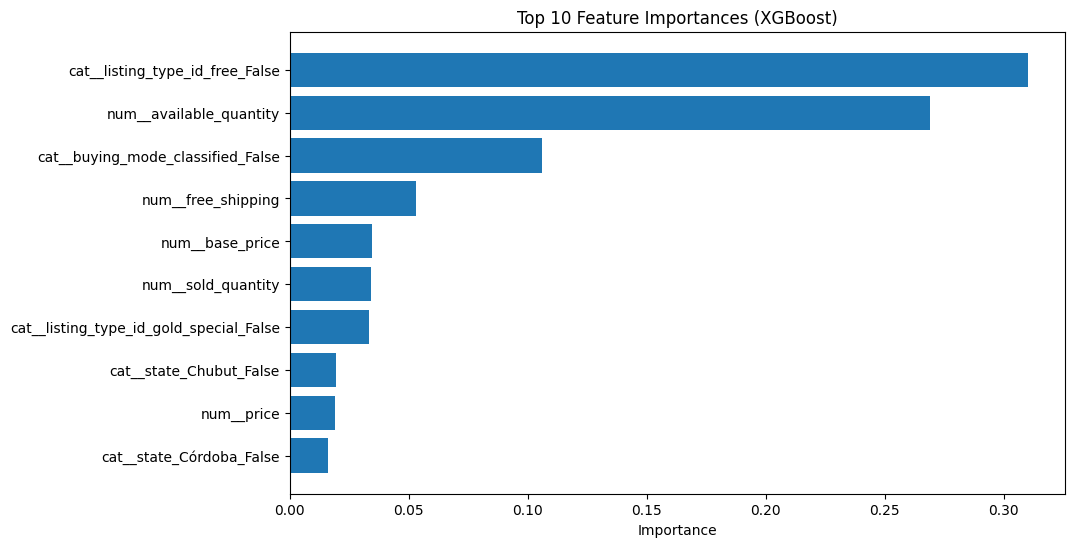

In [17]:
plt.figure(figsize=(10, 6))
plt.barh(importances_df['feature'][:10], importances_df['importance'][:10])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances (XGBoost)')
plt.gca().invert_yaxis()
plt.savefig('C:/Users/ASUS/Desktop/Exercise in class - ML/model/xgb_feature_importances.png')  # Guardar la gráfica
plt.show()

Matriz de confusión

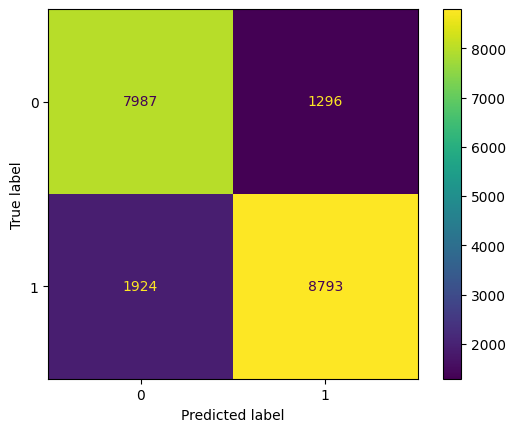

In [26]:
xgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42, verbosity=0))
])

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)


cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.savefig('C:/Users/ASUS/Desktop/Exercise in class - ML/model/xgb_Matriz_confucion.png')

Curva ROC y AUC: rendimiento del modelo a distintos umbrales de clasificación

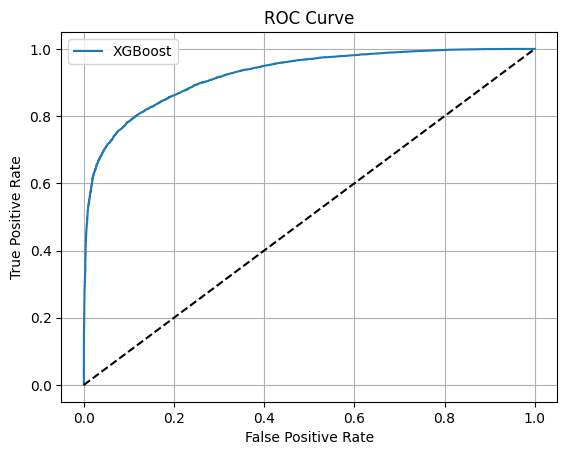

AUC: 0.9243


<Figure size 640x480 with 0 Axes>

In [27]:
# Probabilidades
y_proba = xgb_model.predict_proba(X_test)[:, 1]

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label='XGBoost')
plt.plot([0, 1], [0, 1], 'k--')  # línea aleatoria
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()
plt.savefig('C:/Users/ASUS/Desktop/Exercise in class - ML/model/xgb_curva_ROC.png')

auc = roc_auc_score(y_test, y_proba)
print(f"AUC: {auc:.4f}")